# HEART DISEASE PREDICTION

### importing necessary libraries

In [28]:
# import all dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [29]:
# loading csv data to pands data frame

heart_disease_df = pd.read_csv('/content/heart_disease_data.csv')
# to get first five data from the data  list
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
# to get last five datas from the dataset
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [31]:
# to extract basic information from the dataset fro better understaing of data
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
# to know the number of row and columns
heart_disease_df.shape

(303, 14)

In [33]:
# checking distribution of target variable
target_count_value=heart_disease_df['target'].value_counts()
target_count_value

,count
target,
1,165
0,138


In [34]:
heart_disease_df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


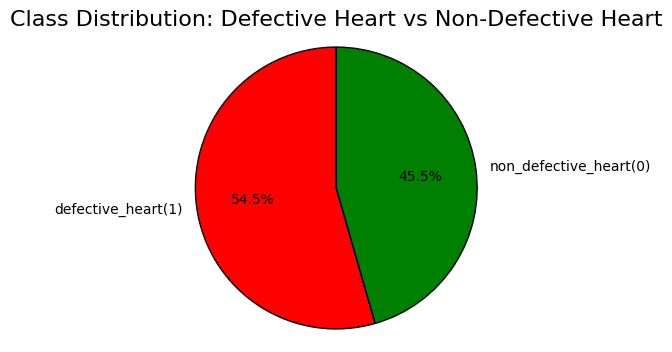

In [35]:
# visulaising the data using matplotlib
labels = ['defective_heart(1)', 'non_defective_heart(0)']
sizes = target_count_value.values

# Define colors for the segments
colors = ['red', 'green']

# Plot the pie chart
plt.figure(figsize=(4,4))  # Make the figure square for better pie chart shape
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Class Distribution: Defective Heart vs Non-Defective Heart', fontsize=16)

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()




In [36]:
# statiscal measures of the data
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


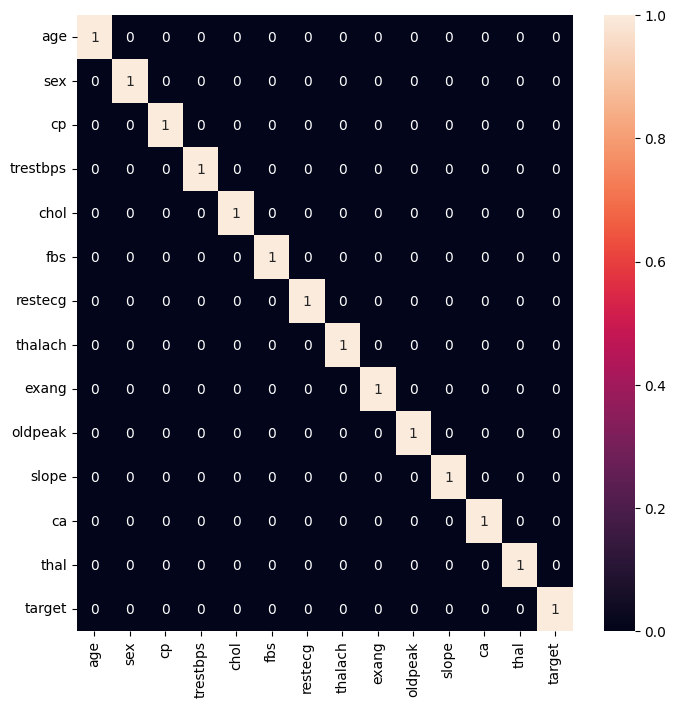

In [37]:
plt.figure(figsize=(8,8))
sb.heatmap(heart_disease_df.corr() > 0.6, annot=True, cbar=True,color='green')
plt.show()

In [38]:
 #Select the columns to normalize (excluding target as it's categorical)
columns_to_normalize = heart_disease_df.columns[:-1]  # Exclude 'target' column for normalization

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data
df_normalized = heart_disease_df.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(heart_disease_df[columns_to_normalize])

print(df_normalized)
# Z-score Standardization
#This method standardizes the features by removing the mean and scaling to unit variance. It’s useful when your features have a normal distribution.
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the data
df_standardized = heart_disease_df.copy()
df_standardized[columns_to_normalize] = scaler.fit_transform(heart_disease_df[columns_to_normalize])

print(df_standardized)

          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053   
1    0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496   
2    0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992   
3    0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794   
4    0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290   
..        ...  ...       ...       ...       ...  ...      ...       ...   
298  0.583333  0.0  0.000000  0.433962  0.262557  0.0      0.5  0.396947   
299  0.333333  1.0  1.000000  0.150943  0.315068  0.0      0.5  0.465649   
300  0.812500  1.0  0.000000  0.471698  0.152968  1.0      0.5  0.534351   
301  0.583333  1.0  0.000000  0.339623  0.011416  0.0      0.5  0.335878   
302  0.583333  0.0  0.333333  0.339623  0.251142  0.0      0.0  0.786260   

     exang   oldpeak  slope    ca      thal  target  
0      0.0  0.370968    0.0  0.00

In [39]:
# splitting data into training and tst model
features = heart_disease_df.drop(['target'], axis=1)
target = heart_disease_df['target']
# training the data
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)
features.shape,xtrain.shape, xtest.shape

((303, 13), (242, 13), (61, 13))

In [40]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf'),RandomForestClassifier()]

for i in range(4):
    models[i].fit(xtrain, ytrain)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, models[i].predict(xtest)))
    print()


LogisticRegression() : 
Training Accuracy :  0.8416208791208789
Validation Accuracy :  0.8895604395604396

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.8131868131868132

SVC() : 
Training Accuracy :  0.645673076923077
Validation Accur

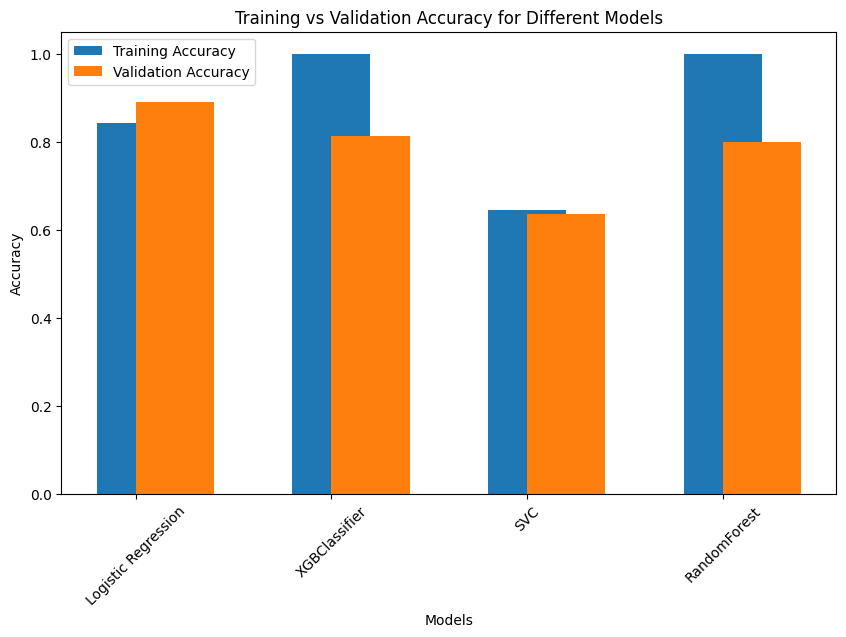

In [44]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
model_names = ['Logistic Regression', 'XGBClassifier', 'SVC', 'RandomForest']
training_accuracies = [0.8416, 1.0, 0.6457, 1.0]
validation_accuracies = [0.8896, 0.8132, 0.6357, 0.7989]

# Plotting
x = range(len(model_names))
plt.figure(figsize=(10, 6))

# Bar chart for training and validation accuracies
plt.bar(x, training_accuracies, width=0.4, label='Training Accuracy', align='center')
plt.bar(x, validation_accuracies, width=0.4, label='Validation Accuracy', align='edge')

# Labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for Different Models')
plt.xticks(x, model_names, rotation=45)
plt.legend()

# Show the plot
plt.show()


In [41]:
#classification report
for i in range(4):
  print(models[i])
  print(metrics.classification_report(ytest, models[i].predict(xtest)))

LogisticRegression()
              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.87      0.97      0.92        35

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_str

### building a predictive model

In [42]:
import numpy as np

#input_data =(66,1,1,234,217,0,1,190,1,0.2,0,1,2 )
input_data =(56,1,1,120,236,0,1,178,0,0.8,2,0,2)

# changing input data into numpy array
input_data_np = np.asarray(input_data)
reshaped_data =input_data_np.reshape(1, -1)
prediction = models[0].predict(reshaped_data)
if prediction == 1:
  print('the patient have heart disease')
elif prediction == 0:
  print('the patient have  NO heart disease')
else:
  print('invalid input!! try again')


the patient have heart disease


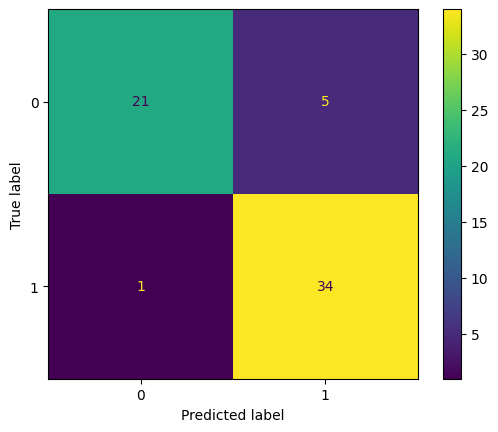

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'models[0]' is our trained classifier
cm = confusion_matrix(ytest, models[0].predict(xtest))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[0].classes_) # Assuming your model has a 'classes_' attribute
disp.plot()
plt.show()